In [1]:
# load DESeq
library("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Warning message:


In [2]:
outdir = '/home/h1bennet/liverStrains/results/180409_RNA_4wk/'

In [48]:
counts_mat = read.table(paste0(outdir, "rnaseq_matrix_condenseGenes_exons_raw_mat_deseq.txt"),
                        sep='\t', header=TRUE, row.names=1)

col_data = read.table(paste0(outdir, "rnaseq_matrix_condenseGenes_exons_raw_deseq_col_info.txt"),
                      sep='\t', header=TRUE)

In [49]:
subjects <- c(FALSE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, FALSE, TRUE, TRUE)
subjects <- c(FALSE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, FALSE, FALSE)

In [50]:
counts_mat = counts_mat[, subjects]
col_data = col_data[subjects, ]

In [51]:
col_data$diet_time <- relevel(col_data$diet_time, ref='Control')

In [52]:
table(col_data$diet_time)


 Control AMLN_1wk AMLN_4wk 
       2        2        2 

In [53]:
#create DESeq2 object

dds <- DESeqDataSetFromMatrix(countData = counts_mat,
                             colData = col_data,
                             design = ~ diet_time)

converting counts to integer mode


In [54]:
# run DESeq with full model
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [55]:
# diet effect for ncorwt
res <- results(dds, contrast=c('diet_time', 'AMLN_4wk', 'Control'), alpha = 0.01)
head(res)

log2 fold change (MLE): diet_time AMLN_4wk vs Control 
Wald test p-value: diet time AMLN 4wk vs Control 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE       stat    pvalue      padj
              <numeric>      <numeric> <numeric>  <numeric> <numeric> <numeric>
NM_001329047 2504.94785      0.4194133 0.2528688  1.6586204 0.0971923 0.2920565
NM_172405      68.95224      0.2982685 0.3895671  0.7656409 0.4438900 0.6876169
NM_001166375 3833.73294      0.1233597 0.1873951  0.6582865 0.5103540 0.7400134
NM_178061      89.07245     -0.2745779 0.3717522 -0.7386047 0.4601471 0.6989288
NR_045798      33.92200      0.1302486 0.5201785  0.2503921 0.8022841 0.9130542
NM_013933    1770.76799      0.5122639 0.2228981  2.2981984 0.0215505 0.1150292

In [56]:
summary(res)


out of 17920 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)     : 499, 2.8% 
LFC < 0 (down)   : 213, 1.2% 
outliers [1]     : 0, 0% 
low counts [2]   : 5131, 29% 
(mean count < 11)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [57]:
res_ordered <- res[order(res$padj), ]

In [58]:
head(res_ordered)

log2 fold change (MLE): diet_time AMLN_4wk vs Control 
Wald test p-value: diet time AMLN 4wk vs Control 
DataFrame with 6 rows and 6 columns
              baseMean log2FoldChange     lfcSE      stat       pvalue
             <numeric>      <numeric> <numeric> <numeric>    <numeric>
NM_011029     470.7031       4.868583 0.3036494  16.03357 7.448135e-58
NM_024266     637.1430       4.145828 0.2721125  15.23571 2.048826e-52
NM_009078     381.8830       6.515022 0.4645563  14.02418 1.108824e-44
NM_001317217  733.8789       3.032360 0.2409483  12.58510 2.550095e-36
NM_029751     638.2948       3.008108 0.2418996  12.43536 1.679905e-35
NM_018860    1025.1411       2.460538 0.2018761  12.18836 3.585635e-34
                     padj
                <numeric>
NM_011029    9.525419e-54
NM_024266    1.310122e-48
NM_009078    4.726917e-41
NM_001317217 8.153291e-33
NM_029751    4.296862e-32
NM_018860    7.642780e-31

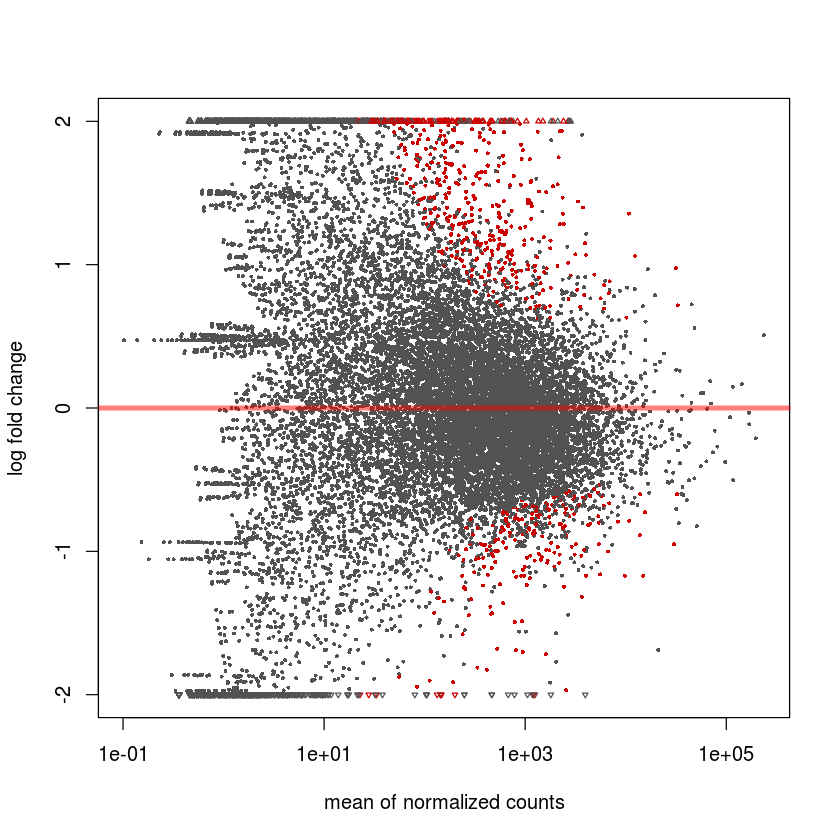

In [59]:
plotMA(res, ylim=c(-2,2))

In [60]:
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/rnaseq_c57bl6_amln_4wk_deseq_results.txt"))

In [61]:
# diet effect for ncorwt
res <- results(dds, contrast=c('diet_time', 'AMLN_4wk', 'AMLN_1wk'), alpha = 0.01)
head(res)

log2 fold change (MLE): diet_time AMLN_4wk vs AMLN_1wk 
Wald test p-value: diet_time AMLN_4wk vs AMLN_1wk 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE       stat       pvalue
              <numeric>      <numeric> <numeric>  <numeric>    <numeric>
NM_001329047 2504.94785    -0.04616431 0.2523850 -0.1829123 8.548669e-01
NM_172405      68.95224    -0.17171666 0.3782779 -0.4539432 6.498697e-01
NM_001166375 3833.73294    -0.91767177 0.1867465 -4.9139974 8.923795e-07
NM_178061      89.07245     0.21897136 0.3719746  0.5886729 5.560808e-01
NR_045798      33.92200     0.29857278 0.5146244  0.5801761 5.617959e-01
NM_013933    1770.76799    -0.21111975 0.2218919 -0.9514530 3.413745e-01
                     padj
                <numeric>
NM_001329047 9.335127e-01
NM_172405    8.261442e-01
NM_001166375 6.860823e-05
NM_178061    7.663048e-01
NR_045798    7.700309e-01
NM_013933    5.956216e-01

In [62]:
summary(res)


out of 17920 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)     : 373, 2.1% 
LFC < 0 (down)   : 319, 1.8% 
outliers [1]     : 0, 0% 
low counts [2]   : 6157, 34% 
(mean count < 24)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [63]:
res_ordered <- res[order(res$padj), ]

In [64]:
head(res_ordered)

log2 fold change (MLE): diet_time AMLN_4wk vs AMLN_1wk 
Wald test p-value: diet_time AMLN_4wk vs AMLN_1wk 
DataFrame with 6 rows and 6 columns
              baseMean log2FoldChange     lfcSE       stat       pvalue
             <numeric>      <numeric> <numeric>  <numeric>    <numeric>
NM_001162938  253.1117      -5.987608 0.4419642 -13.547720 8.172950e-42
NM_019414     271.8974      -7.178826 0.6681875 -10.743731 6.342798e-27
NM_001324534  226.3443      -8.352931 0.8792593  -9.499963 2.099649e-21
NM_001122730 3471.9767       1.426942 0.1527610   9.341010 9.541964e-21
NM_001001884  576.6005       1.981698 0.2203285   8.994289 2.377666e-19
NM_012055     109.3973       5.465241 0.6096710   8.964247 3.124088e-19
                     padj
                <numeric>
NM_001162938 9.613841e-38
NM_019414    3.730517e-23
NM_001324534 8.232722e-18
NM_001122730 2.806053e-17
NM_001001884 5.593697e-16
NM_012055    6.124775e-16

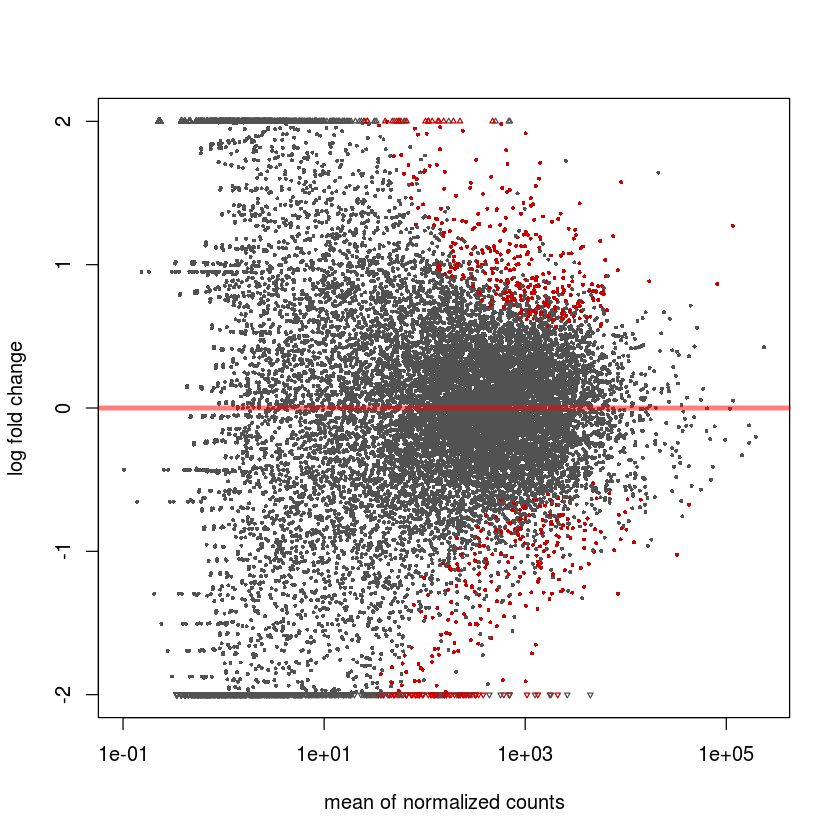

In [65]:
plotMA(res, ylim=c(-2,2))

In [66]:
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/rnaseq_c57bl6_amln_4wk_1wk_deseq_results.txt"))

In [67]:
# diet effect for ncorwt
res <- results(dds, contrast=c('diet_time', 'AMLN_1wk', 'Control'), alpha = 0.01)
head(res)

log2 fold change (MLE): diet_time AMLN_1wk vs Control 
Wald test p-value: diet time AMLN 1wk vs Control 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat       pvalue
              <numeric>      <numeric> <numeric> <numeric>    <numeric>
NM_001329047 2504.94785      0.4655777 0.2523501  1.844967 6.504227e-02
NM_172405      68.95224      0.4699851 0.3752313  1.252521 2.103801e-01
NM_001166375 3833.73294      1.0410314 0.1864757  5.582666 2.368597e-08
NM_178061      89.07245     -0.4935493 0.3629183 -1.359946 1.738470e-01
NR_045798      33.92200     -0.1683242 0.5067061 -0.332193 7.397435e-01
NM_013933    1770.76799      0.7233837 0.2219459  3.259280 1.116956e-03
                     padj
                <numeric>
NM_001329047 1.406830e-01
NM_172405    3.430354e-01
NM_001166375 5.301015e-07
NM_178061    2.972387e-01
NR_045798    8.278435e-01
NM_013933    5.421017e-03

In [68]:
summary(res)


out of 17920 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)     : 1663, 9.3% 
LFC < 0 (down)   : 1559, 8.7% 
outliers [1]     : 0, 0% 
low counts [2]   : 4447, 25% 
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [69]:
res_ordered <- res[order(res$padj), ]

In [70]:
head(res_ordered)

log2 fold change (MLE): diet_time AMLN_1wk vs Control 
Wald test p-value: diet time AMLN 1wk vs Control 
DataFrame with 6 rows and 6 columns
           baseMean log2FoldChange     lfcSE      stat       pvalue
          <numeric>      <numeric> <numeric> <numeric>    <numeric>
NM_011029  470.7031       4.880788 0.3019982  16.16165 9.401587e-59
NM_024266  637.1430       4.309049 0.2705069  15.92953 3.952909e-57
NM_172736 5573.4285      -2.326655 0.1495567 -15.55701 1.426023e-54
NM_009078  381.8830       6.399236 0.4634239  13.80860 2.261780e-43
NM_029751  638.2948       3.249420 0.2398986  13.54497 8.484767e-42
NM_011296  589.5009       2.982730 0.2371712  12.57627 2.851741e-36
                  padj
             <numeric>
NM_011029 1.266676e-54
NM_024266 2.662877e-53
NM_172736 6.404269e-51
NM_009078 7.618239e-40
NM_029751 2.286305e-38
NM_011296 6.403584e-33

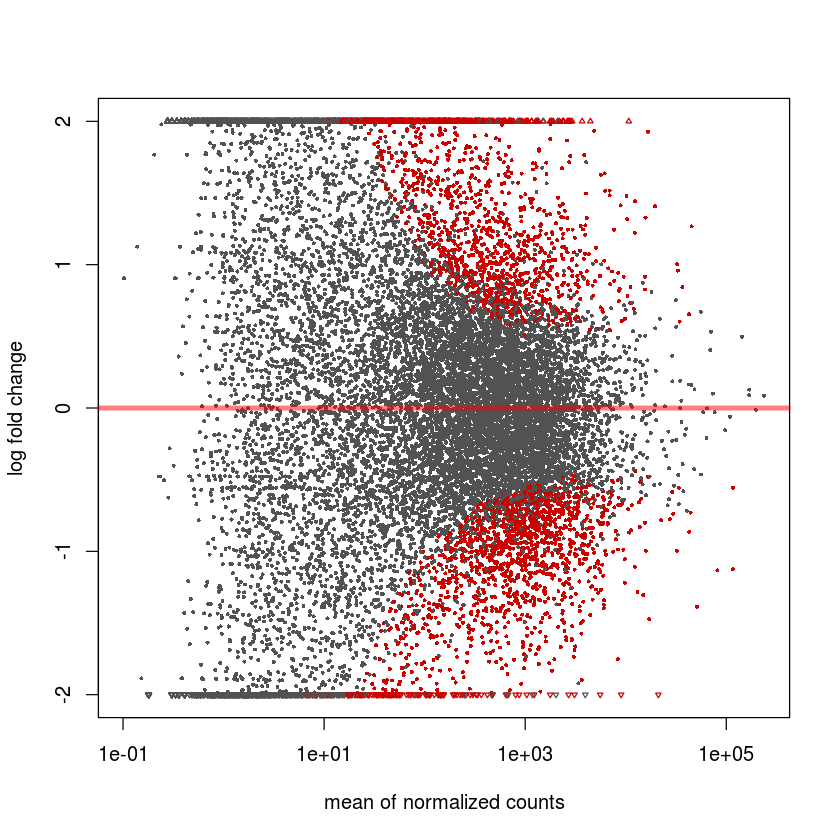

In [71]:
plotMA(res, ylim=c(-2,2))

In [72]:
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/rnaseq_c57bl6_amln_1wk_deseq_results.txt"))